In [15]:
# 사용할 모듈의 함수를 정의
import os
import mne
from mne.io import read_raw_fif

# eeg 데이터의 경로를 정의
eeg_data_path = 'data/00002806_s001_t000_with_ecg.fif'

# 데이터를 읽기
raw = read_raw_fif(eeg_data_path, preload=True)

# channel drop!
raw.drop_channels(['EEG SP1-REF', 'EEG SP2-REF', 'EEG LUC-REF', 'EEG RLC-REF', 'EEG RESP1-REF', 'EEG RESP2-REF', 'EEG 31-REF'])

montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))

montage = mne.channels.read_montage(montage_dir + '/standard_postfixed.elc')

ch_count = 0

for ch in raw.ch_names:
    try:
        ch_name_with_EEG_txt = ch.split('-')[0]
        ch_name = ch_name_with_EEG_txt.split(' ')[1]
        mnt_count = 0
        for ch_mnt in montage.ch_names:
            if ch_name in ch_mnt.upper():
                raw.info['chs'][ch_count]['loc'] = montage.pos[mnt_count]
            mnt_count = mnt_count + 1 

        ch_count = ch_count + 1
    except:
        ch_count = ch_count + 1

Opening raw data file C:\Users\dDk13\Desktop\EEG_processing\02\data\00002806_s001_t000_with_ecg.fif...
Isotrak not found
    Range : 0 ... 10399 =      0.000 ...    25.997 secs
Ready.
Reading 0 ... 10399  =      0.000 ...    25.997 secs...

BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


<ipython-input-15-89e63a821326>:10: RuntimeWarning: This filename (C:\Users\dDk13\Desktop\EEG_processing\02\data\00002806_s001_t000_with_ecg.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = read_raw_fif(eeg_data_path, preload=True)


Dropped 0 epochs
Channels marked as bad: []
Dropped 0 epochs
Channels marked as bad: []


<IPython.core.display.Javascript object>


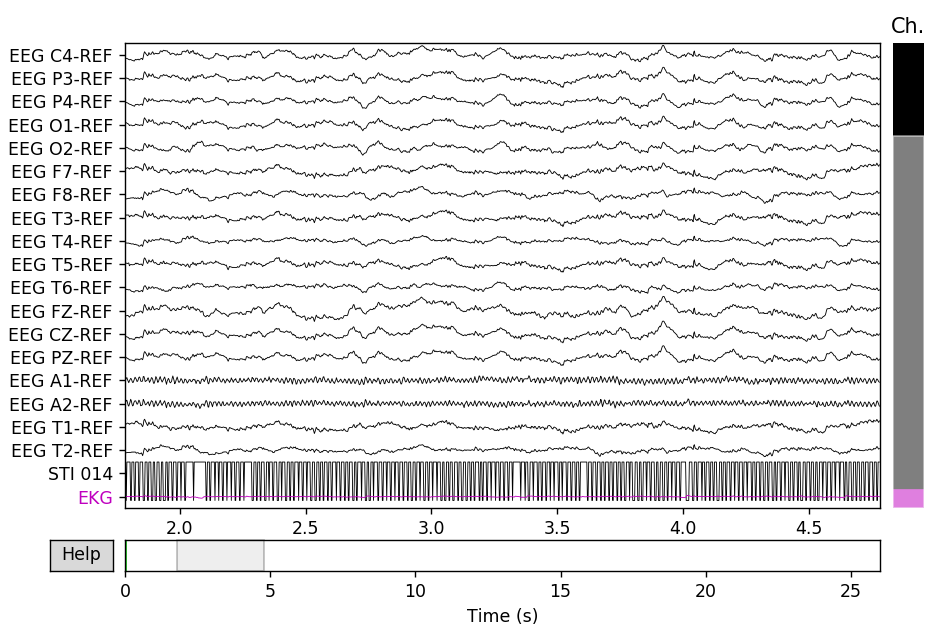

<IPython.core.display.Javascript object>


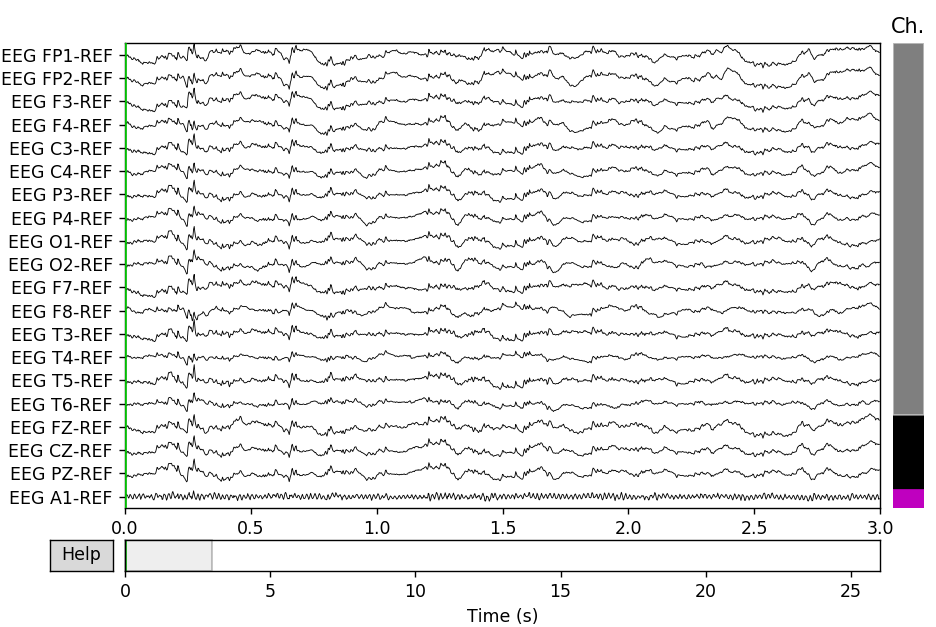

In [21]:
%matplotlib notebook

# EEG를 display with scalings
# EKG 부분의 색이 변경됨을 확인
raw.plot(duration=3, scalings = dict(eeg = 80e-6))

In [23]:
picks = mne.pick_types(raw.info, eeg=True, ecg=False, eog=False, stim=False) # select only EEG channel
events = mne.find_events(raw, stim_channel ='STI 014', shortest_event = 1) # stimulus channel = STI 014
event_id, tmin, tmax = 1, -0.300, 1.200 # STI 014 하나 이므로 event_id = 1 / -0.025 / 0.050 (0,3)
baseline = (None, 0)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks, baseline=baseline, preload=True)

Trigger channel has a non-zero initial value of 131062 (consider using initial_event=True to detect this event)
5052 events found
Event IDs: [     1      2      3      4      5      6      7      8      9     10
     11     12     13     14     15     16     17     18     19     20
     21     22     24     25     28     30     37 131029 131030 131035
 131037 131038 131039 131040 131041 131042 131043 131044 131045 131046
 131047 131048 131049 131050 131051 131052 131053 131054 131055 131056
 131057 131058 131059 131060 131061 131062 131063 131064 131065 131066
 131067 131068 131069 131070]
32 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 32 events and 601 original time points ...
1 bad epochs dropped


In [24]:
events

array([[     1, 131062, 131063],
       [     3,      3, 131070],
       [     6, 131051, 131055],
       ...,
       [ 10394, 131044, 131060],
       [ 10396,      3,     12],
       [ 10398,      3, 131063]], dtype=int64)

<IPython.core.display.Javascript object>


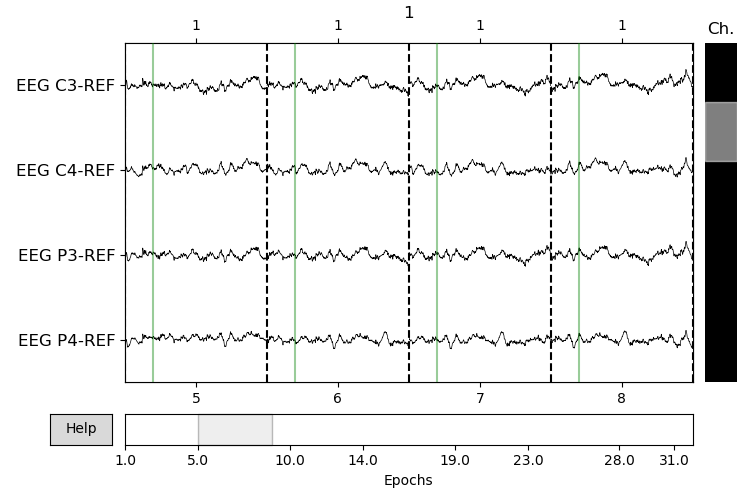

<IPython.core.display.Javascript object>


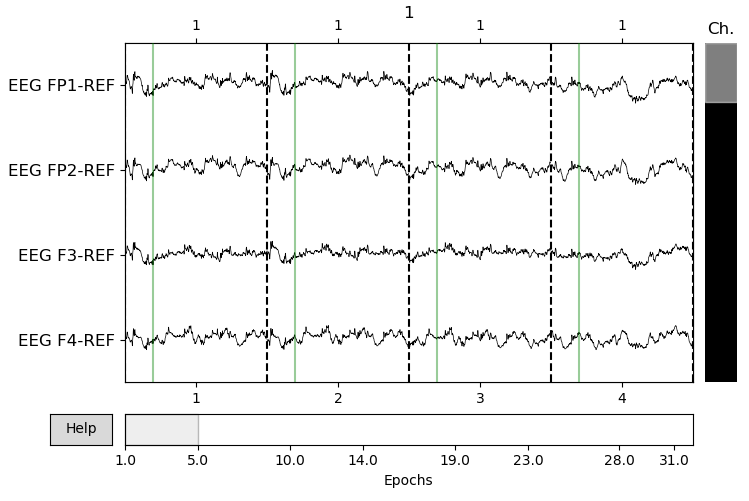

In [25]:
scalings = dict(eeg=80e-6, eog=10e+4, ecg=10e+4)

epochs.plot(n_channels=4, n_epochs=4, scalings=scalings)

Delta : < 4 | Theta : 4~7 | Alpha : 8~15 | Beta : 16~31 | Gamma : > 32 | Mu : 8~12
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


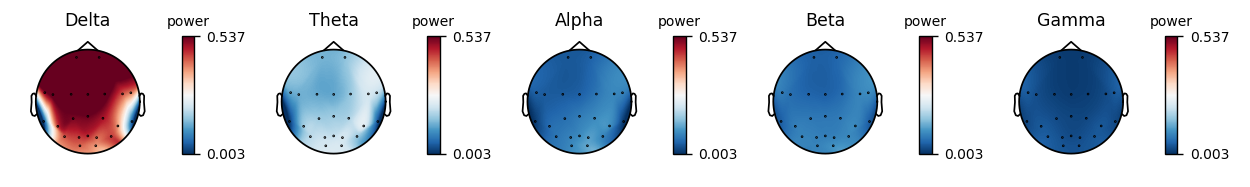

<IPython.core.display.Javascript object>


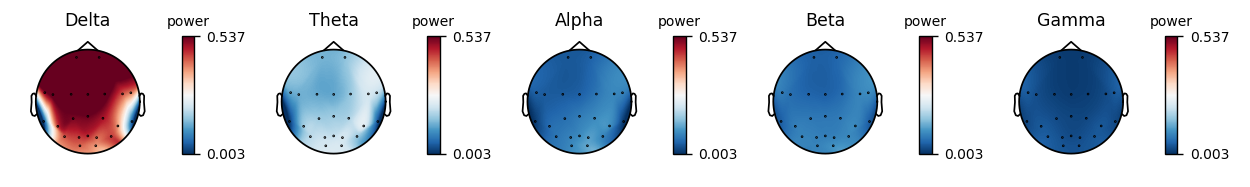

In [26]:
print('Delta : < 4 | Theta : 4~7 | Alpha : 8~15 | Beta : 16~31 | Gamma : > 32 | Mu : 8~12')
epochs.plot_psd_topomap(ch_type='eeg', vmin=0.003, vmax=0.537, normalize=True)